In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import FeatureUnion

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import pickle


from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('3.1ReviewsUpdatedDec19.csv', encoding='utf-8')


In [3]:
df.head(20)

,Username,Userid,Rating,Helpfulness,Comment,TimeCreated,Target,CommentToStr,SimpleCommentManglish,LengthManglish,...,EnglishExpandContraction,PosTags,FrequencyAdverbs,FrequencyVerbs,FrequencyAdjectives,FrequencyNouns,StopWords,LatestPosTagForLemmatize,Lematize,FinalCleanComment
0,i*****_,218195265,3,0.0,SSD boleh pakai cuma...bila dah transfer tetib...,2/25/2022 22:20,1,SSD boleh pakai cuma...bila dah transfer tetib...,solid state drive boleh pakai cuma bila dah tr...,23,...,"['solid', 'state', 'drive', 'can', 'only', 'be...","['JJ', 'NN', 'NN', 'MD', 'RB', 'VB', 'VBN', 'W...",0.090909,0.181818,0.090909,0.318182,"['solid', 'state', 'drive', 'used', 'moving', ...","['JJ', 'NN', 'NN', 'VBN', 'VBG', 'NN', 'JJ', '...","['solid', 'state', 'drive', 'use', 'move', 'fi...",solid state drive use move file empty waste ti...
1,simonchan1905,705330191,1,1.0,Never trust or purchase usb or sd card if the ...,2022-07-29 08:29:09,1,Never trust or purchase usb or sd card if the ...,never trust or purchase USB or sd card if the ...,42,...,"['i', 'never', 'trust', 'or', 'buy', 'usb', 'o...","['NN', 'RB', 'NN', 'CC', 'VB', 'JJ', 'CC', 'JJ...",0.088889,0.200000,0.177778,0.200000,"['never', 'trust', 'buy', 'usb', 'sd', 'card',...","['RB', 'NN', 'VB', 'JJ', 'JJ', 'NN', 'NN', 'JJ...","['never', 'trust', 'buy', 'usb', 'sd', 'card',...",never trust buy usb sd card price good true le...
2,ladydelilah,90528909,5,0.0,"Alhamdulillah dh smpi, terus guna.. saje amek ...",2022-01-07 11:28:36,0,"Alhamdulillah dh smpi, terus guna.. saje amek ...",alhamdulillah dh sampai terus guna saje amek k...,14,...,"['thank', 'god', 'it', 'is', 'just', 'to', 'ta...","['NN', 'NN', 'PRP', 'VBZ', 'RB', 'TO', 'VB', '...",0.071429,0.214286,0.071429,0.357143,"['thank', 'god', 'take', 'pink', 'kaler', 'fan...","['NN', 'NN', 'VB', 'NN', 'NN', 'NNS', 'JJ']","['thank', 'god', 'take', 'pink', 'kaler', 'fan...",thank god take pink kaler fan pretty.
3,anna_aizad,34734312,1,7.0,All my file corrupted after saving a few file ...,2022-07-13 14:28:30,1,All my file corrupted after saving a few file ...,all saya punya file corrupted after saving a f...,30,...,"['all', 'i', 'have', 'corrupted', 'file', 'aft...","['DT', 'NNS', 'VBP', 'VBN', 'NN', 'IN', 'VBG',...",0.064516,0.258065,0.129032,0.290323,"['corrupted', 'file', 'saving', 'files', 'even...","['VBN', 'NN', 'VBG', 'NNS', 'RB', 'IN', 'VBP',...","['corrupt', 'file', 'save', 'file', 'even', 't...",corrupt file save file even though buy solid s...
4,b*****d,758613696,5,2.0,"Box came bubble-wrapped, so everything is in g...",2022-07-12 13:33:12,0,"Box came bubble-wrapped, so everything is in g...",box came bubble wrapped so everything ialah da...,44,...,"['the', 'box', 'came', 'bubble', 'wrapped', 's...","['DT', 'NN', 'VBD', 'JJ', 'VBN', 'RB', 'DT', '...",0.073171,0.195122,0.268293,0.243902,"['box', 'came', 'bubble', 'wrapped', 'good', '...","['NN', 'VBD', 'JJ', 'VBN', 'JJ', 'NN', 'NN', '...","['box', 'come', 'bubble', 'wrap', 'good', 'con...",box come bubble wrap good condition capacity t...
5,beskotkebeng,184848780,5,2.0,Copy speed based on your internal storage. Man...,2020-10-04 09:57:55,1,Copy speed based on your internal storage. Man...,copy speed based your internal storage manage ...,47,...,"['your', 'internal', 'speed', 'copy', 'manages...","['PRP$', 'JJ', 'NN', 'NN', 'VBZ', 'TO', 'VB', ...",0.000000,0.285714,0.142857,0.285714,"['internal', 'speed', 'copy', 'manages', 'get'...","['JJ', 'NN', 'NN', 'VBZ', 'VB', 'NNS', 'VB', '...","['internal', 'speed', 'copy', 'manage', 'get',...",internal speed copy manage get megabyte write ...
6,mikrobistro,554068149,2,3.0,Barang sampai dlm keadaan baik tp kenapa hard ...,5/19/2022 12:27,1,Barang sampai dlm keadaan baik tp kenapa hard ...,barang sampai dlm keadaan baik tp kenapa hard ...,20,...,"['goods', 'are', 'in', 'good', 'condition', 'b...","['NNS', 'VBP', 'IN', 'JJ', 'NN', 'CC', 'WRB', ...",0.000000,0.240000,0.120000,0.240000,"['goods', 'good', 'condition', 'hard', 'disc',...","['NNS', 'JJ', '

# VIEW CLEANED DATA

Text(0.5, 0, 'Target')

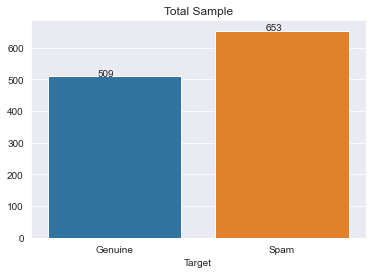

In [4]:
y = df["Target"]
ax = sns.barplot(x=['Genuine','Spam'],
                 y=[sum(y==1),sum(y==0)])
for i,v in enumerate([sum(y==1),sum(y==0)]):
    ax.text(i - .1,v + 1,v)
ax.set_title("Total Sample")
ax.set_xlabel('Target')

In [5]:
df_true = df[df['Target'] == 1]
df_false = df[df['Target']== 0]

In [6]:
print(df_true.describe())

             Userid      Rating  Helpfulness  Target  LengthManglish  \
count  5.090000e+02  509.000000   509.000000   509.0      509.000000   
mean   1.249765e+08    3.345776     2.905697     1.0       39.889980   
std    1.205394e+08    1.760874     6.583126     0.0       15.239288   
min    5.328470e+05    1.000000     0.000000     1.0        7.000000   
25%    4.546672e+07    1.000000     0.000000     1.0       28.000000   
50%    8.702060e+07    4.000000     1.000000     1.0       40.000000   
75%    1.659083e+08    5.000000     3.000000     1.0       52.000000   
max    8.115544e+08    5.000000    62.000000     1.0       81.000000   

       TotalEmoji  TotalPunct   TotalCaps  FrequencyAdverbs  FrequencyVerbs  \
count  509.000000  509.000000  509.000000        509.000000      509.000000   
mean     0.326130    7.520629    7.595285          0.082031        0.199351   
std      0.911284    4.566015    7.754682          0.050036        0.055991   
min      0.000000    0.000000    0.

In [7]:
print(df_false.describe())

             Userid      Rating  Helpfulness  Target  LengthManglish  \
count  6.530000e+02  653.000000   653.000000   653.0      653.000000   
mean   1.308459e+08    4.914242     0.120980     0.0       17.091884   
std    1.253393e+08    0.386104     0.652323     0.0       12.277997   
min    5.147990e+05    1.000000     0.000000     0.0        1.000000   
25%    4.621724e+07    5.000000     0.000000     0.0       10.000000   
50%    8.830716e+07    5.000000     0.000000     0.0       14.000000   
75%    1.755045e+08    5.000000     0.000000     0.0       21.000000   
max    7.783613e+08    5.000000    10.000000     0.0       68.000000   

       TotalEmoji  TotalPunct   TotalCaps  FrequencyAdverbs  FrequencyVerbs  \
count  653.000000  653.000000  653.000000        653.000000      653.000000   
mean     0.846861    4.139357    3.246554          0.077738        0.161263   
std      3.825304    4.085422    3.909895          0.100007        0.103586   
min      0.000000    0.000000    0.

# PREPARING ALL FEATURES FOR PIPELINES


features= [c for c in df.columns.values if c not in ['Username','Userid','Rating','Helpfulness','Comment','TimeCreated','Target','CommentToStr','SimpleCommentManglish','CommentClean1NumberRepeatedElongated','CommentClean2Normalizing','CommentClean3DeepSpellCorrector','CommentClean4EnglishComment','EnglishTokenized','PosTags','StopWords','FrequencyAdverbs','FrequencyVerbs','FrequencyAdjectives','FrequencyNouns']]
print("List of features : \n",*features, sep = "\n")


numeric_features= [c for c in df.columns.values if c not in ['Username','Userid','Rating','Helpfulness','Comment','TimeCreated','Target','CommentToStr','SimpleCommentManglish','CommentClean1NumberRepeatedElongated','CommentClean2Normalizing','CommentClean3DeepSpellCorrector','CommentClean4EnglishComment','EnglishTokenized','PosTags','StopWords','FinalCleanComment','FrequencyAdverbs','FrequencyVerbs','FrequencyAdjectives','FrequencyNouns']]
print("\nList of numeric features : \n",*numeric_features, sep = "\n")
#Class column
target = 'Target'

In [8]:
#from sklearn.model_selection import train_test_split

features= [c for c in df.columns.values if c not in ['Username','Userid','Rating','Helpfulness','Comment','TimeCreated','Target','CommentToStr','SimpleCommentManglish','CommentClean1SimpleSpellCorrector','CommentClean2Normalizing','CommentClean4EnglishComment','EnglishTokenized','EnglishExpandContraction','PosTags','StopWords','LatestPosTagForLemmatize','Lematize']]

print("List of features : \n",*features, sep = "\n")


numeric_features= [c for c in df.columns.values if c not in ['Username','Userid','Rating','Helpfulness','Comment','TimeCreated','Target','CommentToStr','SimpleCommentManglish','CommentClean1SimpleSpellCorrector','CommentClean2Normalizing','CommentClean4EnglishComment','EnglishTokenized','EnglishExpandContraction','PosTags','StopWords','LatestPosTagForLemmatize','Lematize','FinalCleanComment']]

print("\n\nList of numeric features : \n",*numeric_features, sep = "\n")

#Class column
target = 'Target'


List of features : 

LengthManglish
TotalEmoji
TotalPunct
TotalCaps
FrequencyAdverbs
FrequencyVerbs
FrequencyAdjectives
FrequencyNouns
FinalCleanComment


List of numeric features : 

LengthManglish
TotalEmoji
TotalPunct
TotalCaps
FrequencyAdverbs
FrequencyVerbs
FrequencyAdjectives
FrequencyNouns


# SPLITTING DATA FOR TRAINING & TESTING

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [10]:
df[features]

,LengthManglish,TotalEmoji,TotalPunct,TotalCaps,FrequencyAdverbs,FrequencyVerbs,FrequencyAdjectives,FrequencyNouns,FinalCleanComment
0,23,0,12,3,0.090909,0.181818,0.090909,0.318182,solid state drive use move file empty waste ti...
1,42,0,2,7,0.088889,0.200000,0.177778,0.200000,never trust buy usb sd card price good true le...
2,14,0,5,1,0.071429,0.214286,0.071429,0.357143,thank god take pink kaler fan pretty.
3,30,0,0,1,0.064516,0.258065,0.129032,0.290323,corrupt file save file even though buy solid s...
4,44,0,10,7,0.073171,0.195122,0.268293,0.243902,box come bubble wrap good condition capacity t...
...,...,...,...,...,...,...,...,...,...
1157,52,1,4,4,0.038462,0.307692,0.057692,0.211538,register laptop say problem registration serve...
1158,14,0,3,1,0.052632,0.105263,0.210526,0.315789,performance many problem hard disk recommended...
1159,40,0,7,9,0.162162,0.108108,0.135135,0.297297,deliver average item spec function advertised ...
1160,16,0,2,2,0.000000,0.214286,0.214286,0.285714,good condition test crystal disk info prove ge...


# STANDARDIZE PIPELINE TO COMBINE (Int + Text + Densing arrays for NB only)

In [11]:
#from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

#CUSTOM NB ONLY
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

# MINI PIPELINES

In [12]:
comment = Pipeline([
                ('selector', TextSelector(key='FinalCleanComment')),
                ('tfidf', TfidfVectorizer( stop_words='english', ngram_range=(1,2)))
            ])


from sklearn.preprocessing import StandardScaler


length =  Pipeline([
                ('selector', NumberSelector(key='LengthManglish')),
                ('standard', StandardScaler())
            ])

#print(length.fit_transform(X_train))

emoji =  Pipeline([
                ('selector', NumberSelector(key='TotalEmoji')),
                ('standard', StandardScaler())
            ])

punc =  Pipeline([
                ('selector', NumberSelector(key='TotalPunct')),
                ('standard', StandardScaler())
            ])

caps =  Pipeline([
                ('selector', NumberSelector(key='TotalCaps')),
                ('standard', StandardScaler())
            ])

In [13]:
freqAdverbs = Pipeline([
                ('selector', NumberSelector(key='FrequencyAdverbs')),
                ('standard', StandardScaler())
            ])

freqVerbs = Pipeline([
                ('selector', NumberSelector(key='FrequencyVerbs')),
                ('standard', StandardScaler())
            ])

freqAjds = Pipeline([
                ('selector', NumberSelector(key='FrequencyAdjectives')),
                ('standard', StandardScaler())
            ])

freqNouns = Pipeline([
                ('selector', NumberSelector(key='FrequencyNouns')),
                ('standard', StandardScaler())
            ])

# FEATURE UNION

feats = FeatureUnion([('Comment', comment),
                      ('LengthManglish', length),
                      ('TotalEmoji', emoji),
                      ('TotalPunct', punc),
                      ('TotalCaps', caps)
                      ])

In [14]:
#from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('Comment', comment),
                      ('LengthManglish', length),
                      ('TotalEmoji', emoji),
                      ('TotalPunct', punc),
                      ('TotalCaps', caps),
                      ('FrequencyAdverbs',freqAdverbs),
                      ('FrequencyVerbs',freqVerbs),
                      ('FrequencyAdjectives',freqAjds),
                      ('FrequencyNouns',freqNouns)])



#Only to view the pipeline for feats

'''feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)'''


"feature_processing = Pipeline([('feats', feats)])\nfeature_processing.fit_transform(X_train)"

# 3 MAIN PIPELINES

In [15]:
#Random Forest
pipelineRF = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

In [16]:
#SVM
pipelineSVM = Pipeline([
    ('features',feats),
    ('classifier', SVC(kernel='linear', C=1.0)),
])

In [17]:
#Naive Bayes
pipelineNB = Pipeline([
    ('features',feats),
    ('to_dense', DenseTransformer()),#Added for NB Sparse -> Dense
    ('classifier', GaussianNB()),
])

# RESULT FUNCTIONS ONLY

In [18]:
# This function will print the metrcis
def print_model_report(y_test, prediction, ML_modelName):

    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

    print("Model report for: "+ ML_modelName + "\n")

    print(classification_report(y_test, prediction, digits=4))

    #Sensitivity =  Finding % of Predicted True
    #Specificity =  Finding % of Predicted False
    sens = tp / (tp+fn)
    spec = tn / (tn +fp)
    print(f"\nSensitivity : {round(sens,2)}")
    print(f"Specificity : {round(spec,2)} \n\n")

# Show confusion matrix plot
def plot_confusion_matrix(y_test, prediction, ML_modelName, cmap):

    cm = confusion_matrix(y_test, prediction)

    ax = sns.heatmap(cm,
                     annot=True,
                     annot_kws={'size':18,'weight':'normal'},
                     fmt='.20g',
                     cmap=cmap,
                     cbar_kws={'shrink':1},
                     linewidths=2)

    plt.title("Confusion Matrix for: " + ML_modelName)

    plt.ylabel("Actual Label")

    plt.xlabel("Predict Label")

    cbar = ax.collections[0].colorbar

    plt.show()



def crossval(model,model_name, X_train, y_train):

    #Enable if want to use Stratified K-Folds
    SKF = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

    # Perform the testing using KFolds cross validation method!
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=SKF, n_jobs=-1)

    print(f" Accuracy of {model_name} : {round (np.mean(scores), 4)*100} %")

# MODEL FITTING

In [19]:
model_RF = pipelineRF.fit(X_train,y_train)
model_SVM = pipelineSVM.fit(X_train,y_train)
model_NB = pipelineNB.fit(X_train,y_train)

C:\Users\General IRIS\PycharmProjects\FinalYearProject\venv\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


# RESULT FROM CROSSVALIDATION USING K-FOLDS 10 AS OPTIMIZATION ON TRAINING SET

In [20]:
crossval(model_RF,"Random Forest",X_train,y_train)
crossval(model_SVM,"SVM",X_train,y_train)
crossval(model_NB,"Naive Bayes",X_train,y_train)

 Accuracy of Random Forest : 83.53 %
 Accuracy of SVM : 86.98 %
 Accuracy of Naive Bayes : 74.27 %


# RESULT TESTING

In [21]:
%%time
pred_RF = model_RF.predict(X_test)
pred_SVM = model_SVM.predict(X_test)
pred_NB = model_NB.predict(X_test)

CPU times: total: 141 ms
Wall time: 129 ms


C:\Users\General IRIS\PycharmProjects\FinalYearProject\venv\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [22]:
# Print model report for LogisticRegression
# Sens
# Specifity
print_model_report(y_test, pred_RF, "Random Forest")
print_model_report(y_test, pred_SVM, "SVM")
print_model_report(y_test, pred_NB, "Naive Bayes")

Model report for: Random Forest

              precision    recall  f1-score   support

           0     0.8333    0.9398    0.8834       133
           1     0.9036    0.7500    0.8197       100

    accuracy                         0.8584       233
   macro avg     0.8685    0.8449    0.8515       233
weighted avg     0.8635    0.8584    0.8560       233


Sensitivity : 0.75
Specificity : 0.94 


Model report for: SVM

              precision    recall  f1-score   support

           0     0.9538    0.9323    0.9430       133
           1     0.9126    0.9400    0.9261       100

    accuracy                         0.9356       233
   macro avg     0.9332    0.9362    0.9345       233
weighted avg     0.9362    0.9356    0.9357       233


Sensitivity : 0.94
Specificity : 0.93 


Model report for: Naive Bayes

              precision    recall  f1-score   support

           0     0.8692    0.6992    0.7750       133
           1     0.6825    0.8600    0.7611       100

    accurac

# CONFUSION MATRIX

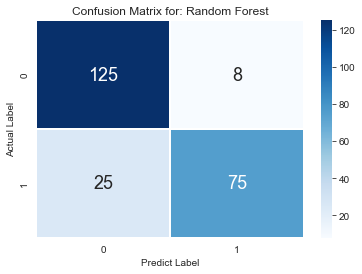

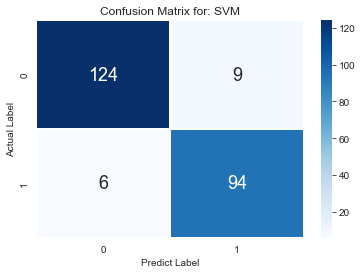

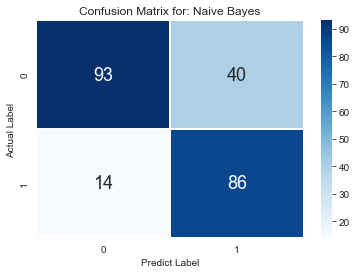

In [23]:
plot_confusion_matrix(y_test, pred_RF, "Random Forest", plt.cm.Blues)
plot_confusion_matrix(y_test, pred_SVM, "SVM", plt.cm.Blues)
plot_confusion_matrix(y_test, pred_NB, "Naive Bayes", plt.cm.Blues)

# DUMPING MODEL

In [24]:

#pickle.dump(model_RF, open('models/model_RF.pkl','wb'))
#pickle.dump(model_SVM, open('models/model_SVMV2.pkl','wb'))
#pickle.dump(model_NB, open('models/model_NB.pkl','wb'))


In [25]:
#joblib.dump(model_RF,"model_RFV2.joblib")

In [26]:
#print(X_test)
X_test = X_test.reset_index()
newdf = pd.DataFrame(pred_RF,columns=['Predicted'])
#print(newdf)
print(pred_RF)
df_merged = pd.concat([X_test, newdf],axis=1)
print(df_merged)

[0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1
 0 1 1 0 0 0 1 1 0 0 1]
     index  LengthManglish  TotalEmoji  TotalPunct  TotalCaps  \
0      244              21           0           3          6   
1      101              18           1           3          3   
2     1080               9           0           3          2   
3      583              17           1           2          2   
4      752              24           1           3          0   
..     ...             ...         ...         ...        ...   
228    920              27           0           7          6   
229   